In [8]:
import pandas as pd

# Load the dataset (replace 'your_file.csv' with the actual file path)
df = pd.read_csv("DSU-Dataset(2).csv")

# Describe the 'High Cost Claim' column
high_cost_summary = df["High Cost Claim"].describe()

# Count occurrences of 1, 0, and null values
high_cost_counts = df["High Cost Claim"].value_counts(dropna=False)

# Display results
print("Summary Statistics for High Cost Claim:\n", high_cost_summary)
print("\nCount of Unique Values including Nulls:\n", high_cost_counts)

Summary Statistics for High Cost Claim:
 count    142100.000000
mean          0.016221
std           0.126325
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: High Cost Claim, dtype: float64

Count of Unique Values including Nulls:
 High Cost Claim
0.0    139795
NaN     35298
1.0      2305
Name: count, dtype: int64


In [10]:


high_cost_claims = df[df["High Cost Claim"] == 1]


summary = high_cost_claims.describe(include="all")


categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_summary = {col: high_cost_claims[col].mode()[0] for col in categorical_columns if not high_cost_claims[col].isna().all()}

print("Summary Statistics for High Cost Claims:\n", summary)
print("\nMost Frequent Categorical Values:\n", categorical_summary)


Summary Statistics for High Cost Claims:
                                                  Claim ID Service Date  \
count                                                2305         2305   
unique                                                107          100   
top     1d0287b30cd79979e82ec4930dc8cdd6c68be56044da11...    5/23/2023   
freq                                                   83           83   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

       Recieved Date  Paid Date  \
count           2305       2305   

C:\Users\DSU\AppData\Local\Temp\ipykernel_11724\3068148509.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series = df["High Cost Claim"].resample("M").sum()  # Aggregate by month


ADF Statistic: 1.2198184203962472
p-value: 0.9961199898334097
Data is NOT stationary. Differencing may be needed.


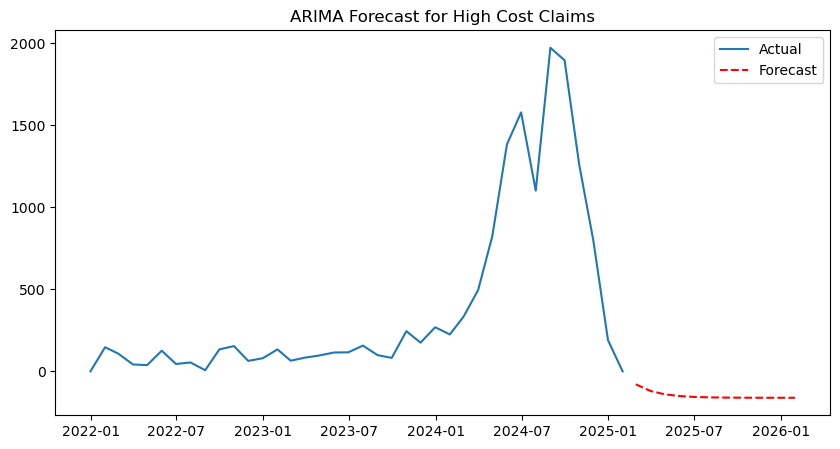

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Load dataset
df = pd.read_csv("DSU-Dataset(2).csv")

# Convert 'Service Date' to datetime and set as index
df["Service Date"] = pd.to_datetime(df["Service Date"])
df = df.set_index("Service Date")

# Select the numerical column to analyze (e.g., "High Cost Claim" or "Paid Amount")
time_series = df["High Cost Claim"].resample("M").sum()  # Aggregate by month

# Step 1: Check Stationarity using Augmented Dickey-Fuller (ADF) Test
def check_stationarity(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("Data is stationary.")
    else:
        print("Data is NOT stationary. Differencing may be needed.")

check_stationarity(time_series)

# Step 2: Fit ARIMA Model (p,d,q)
model = sm.tsa.ARIMA(time_series, order=(1, 1, 1))  # Adjust (p,d,q) as needed
fitted_model = model.fit()

# Step 3: Forecast Next 12 Months
forecast = fitted_model.forecast(steps=12)

# Step 4: Plot Results
plt.figure(figsize=(10, 5))
plt.plot(time_series, label="Actual")
plt.plot(forecast, label="Forecast", linestyle="dashed", color="red")
plt.legend()
plt.title("ARIMA Forecast for High Cost Claims")
plt.show()


C:\Users\DSU\AppData\Local\Temp\ipykernel_11724\2617369831.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series = df["High Cost Claim"].resample("M").sum()  # Aggregate by month


ADF Statistic: 1.2198184203962472
p-value: 0.9961199898334097
Data is NOT stationary. Differencing may be needed.
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=410.026, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=383.737, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=393.004, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=418.521, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=381.964, Time=0.08 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=383.746, Time=0.17 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=385.735, Time=0.29 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=382.682, Time=0.11 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=382.745, Time=0.07 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=391.485, Time=0.07 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=380.467, Time=0.

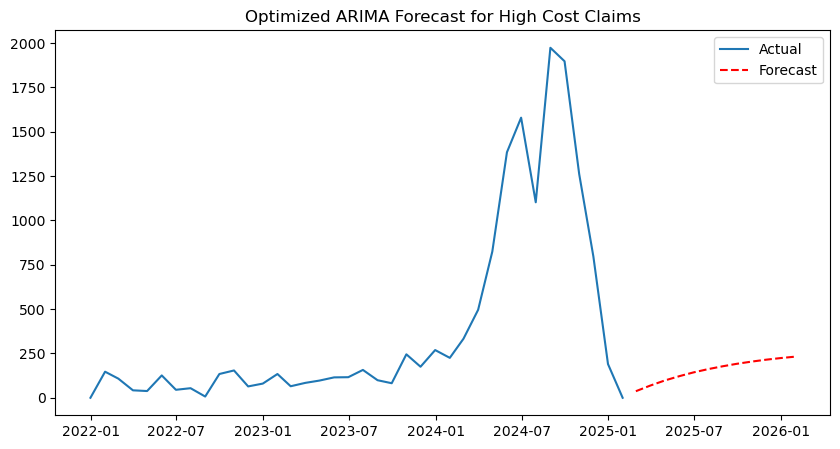

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller

# Load dataset
df = pd.read_csv("DSU-Dataset(2).csv")

# Convert 'Service Date' to datetime and set as index
df["Service Date"] = pd.to_datetime(df["Service Date"])
df = df.set_index("Service Date")

# Select the numerical column to analyze (e.g., "High Cost Claim" or "Paid Amount")
time_series = df["High Cost Claim"].resample("M").sum()  # Aggregate by month

# Step 1: Check Stationarity using Augmented Dickey-Fuller (ADF) Test
def check_stationarity(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("Data is stationary.")
    else:
        print("Data is NOT stationary. Differencing may be needed.")

check_stationarity(time_series)

# Step 2: Auto ARIMA to find optimal (p, d, q)
auto_arima_model = pm.auto_arima(time_series, seasonal=True, m=12, trace=True, suppress_warnings=True)
optimal_order = auto_arima_model.order
print("Optimal ARIMA Order:", optimal_order)

# Step 3: Fit ARIMA Model using the best (p, d, q) from auto_arima
model = sm.tsa.ARIMA(time_series, order=optimal_order)
fitted_model = model.fit()

# Step 4: Forecast Next 12 Months
forecast = fitted_model.forecast(steps=12)

# Step 5: Plot Results
plt.figure(figsize=(10, 5))
plt.plot(time_series, label="Actual")
plt.plot(forecast, label="Forecast", linestyle="dashed", color="red")
plt.legend()
plt.title("Optimized ARIMA Forecast for High Cost Claims")
plt.show()


C:\Users\DSU\AppData\Local\Temp\ipykernel_6532\2644461402.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  high_cost_trend = df["High Cost Claim"].resample("Y").sum()


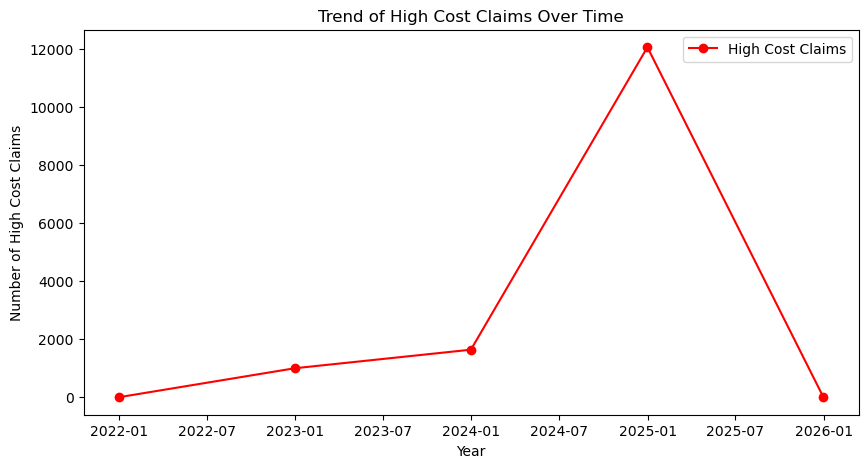

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("DSU-Dataset(2).csv")

# Convert 'Service Date' to datetime and set as index
df["Service Date"] = pd.to_datetime(df["Service Date"])
df = df.set_index("Service Date")

# Aggregate high-cost claims by year
high_cost_trend = df["High Cost Claim"].resample("Y").sum()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(high_cost_trend, marker="o", linestyle="-", color="red", label="High Cost Claims")
plt.title("Trend of High Cost Claims Over Time")
plt.xlabel("Year")
plt.ylabel("Number of High Cost Claims")
plt.legend()
plt.show()


In [37]:
provider_analysis = df.groupby("Provider Type")["High Cost Claim"].sum().sort_values(ascending=False)
print(provider_analysis)


Provider Type
Resource                                     14662.0
Physician                                       36.0
ACUPUNCTURIST                                    0.0
Physician Assistant Certified                    0.0
Licensed Clinical Professional Counselor         0.0
Licensed Marriage and Family Therapist           0.0
Licensed Professional Counselor                  0.0
Licensed Registered Dietitian                    0.0
MEDICAL PHYSICIST                                0.0
Mental Health Counselor                          0.0
Occupational Therapist                           0.0
Optician                                         0.0
Physical Therapist                               0.0
Physician Assistant                              0.0
Provisional SLP                                  0.0
Addictions Counselor                             0.0
Psychiatrist                                     0.0
Psychologist                                     0.0
Radiologist                     

In [11]:
highcost_analysis = df.groupby("High Cost Claim")["Provider Type"].sum().sort_values(ascending=False)
print(highcost_analysis)

High Cost Claim
1.0    ResourceResourceResourceResourceResourceResour...
0.0    PhysicianPhysicianPhysicianPhysicianPhysicianP...
Name: Provider Type, dtype: object


In [39]:
age_analysis = df.groupby("Member Age")["High Cost Claim"].sum().sort_values(ascending=False)
print(age_analysis)


Member Age
60-69 Yrs Old    4291.0
50-59 Yrs Old    2703.0
40-49 Yrs Old    1659.0
30-39 Yrs Old    1416.0
70-79 Yrs Old    1055.0
< 1 Yrs Old       997.0
10-19 Yrs Old     907.0
20-29 Yrs Old     794.0
1-9 Yrs Old       556.0
80-89 Yrs Old     213.0
90-99 Yrs Old     107.0
100+ Yrs Old        0.0
Name: High Cost Claim, dtype: float64


In [41]:
special_analysis = df.groupby("Provider Specialty")["High Cost Claim"].sum().sort_values(ascending=False)
print(special_analysis)

Provider Specialty
ACUTE CARE HOSPITAL (GENERAL)                              14212.0
PHARMACY                                                     117.0
END-STAGE RENAL DISEASE (ESRD) TREATMENT                      86.0
DURABLE MEDICAL EQUIPMENT AND MEDICAL SUPPLIES                68.0
AMBULATORY SURGICAL                                           62.0
                                                            ...   
NP - ENDOCRINOLOGY, DIABETES AND METABOLISM                    0.0
NP - FAMILY MEDICINE                                           0.0
NP - FEMALE PELVIC MEDICINE AND RECONSTRUCTIVE SURGERY         0.0
NP - GASTROENTEROLOGY                                          0.0
VASCULAR SURGERY (SURGERY)                                     0.0
Name: High Cost Claim, Length: 265, dtype: float64


In [43]:
ICD10_analysis = df.groupby("ICD10 Code 1")["High Cost Claim"].sum().sort_values(ascending=False)
print(ICD10_analysis)

ICD10 Code 1
1008.0     427.0
1129.0     356.0
1825.0     332.0
1882.0     276.0
444.0      194.0
           ...  
2933.0       0.0
2932.0       0.0
2931.0       0.0
2930.0       0.0
11323.0      0.0
Name: High Cost Claim, Length: 7496, dtype: float64


In [45]:
ICD102_analysis = df.groupby("ICD10 Code 2")["High Cost Claim"].sum().sort_values(ascending=False)
print(ICD102_analysis)

ICD10 Code 2
266.0      704.0
181.0      596.0
2464.0     493.0
1322.0     368.0
1993.0     314.0
           ...  
2487.0       0.0
2486.0       0.0
2485.0       0.0
2484.0       0.0
11327.0      0.0
Name: High Cost Claim, Length: 6187, dtype: float64


In [47]:
network_analysis = df.groupby("Network Status")["High Cost Claim"].sum().sort_values(ascending=False)
print(network_analysis)

Network Status
IN NETWORK        7812.0
OUT OF NETWORK    3459.0
ND PERS PPO       2058.0
PHCS MULTIPLAN    1278.0
TIER 1              91.0
Name: High Cost Claim, dtype: float64


In [49]:
type_analysis = df.groupby("Service Type")["High Cost Claim"].sum().sort_values(ascending=False)
print(type_analysis)

Service Type
REV     10947.0
PROC     3255.0
DRG       496.0
Name: High Cost Claim, dtype: float64


In [51]:
line_analysis = df.groupby("Claim Line")["High Cost Claim"].sum().sort_values(ascending=False)
print(line_analysis)

Claim Line
MEDICAL     13306.0
PHARMACY     1392.0
Name: High Cost Claim, dtype: float64


C:\Users\DSU\AppData\Local\Temp\ipykernel_6532\1022268994.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series = df["High Cost Claim"].resample("M").sum()


ADF Statistic: 1.2198184203962472
p-value: 0.9961199898334097
Data is NOT stationary. Differencing may be needed.
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=410.026, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=383.737, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=393.004, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=418.521, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=381.964, Time=0.11 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=383.746, Time=0.36 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=385.735, Time=0.38 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=382.682, Time=0.25 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=382.745, Time=0.14 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=391.485, Time=0.11 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=380.467, Time=0.

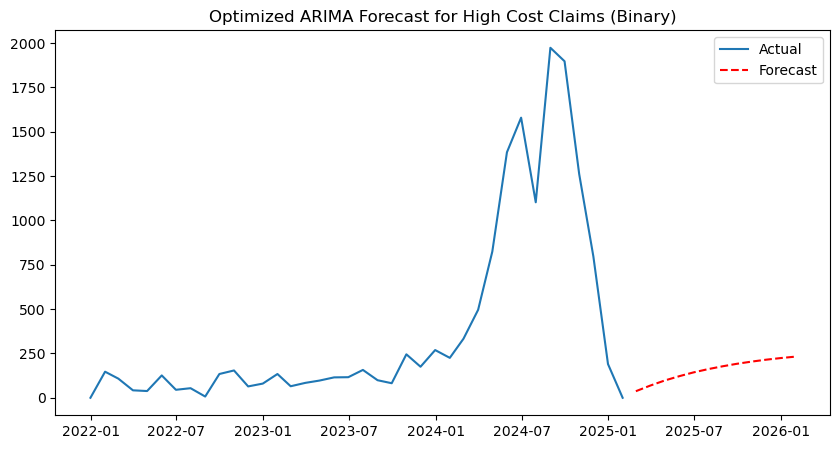

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller

# Load dataset
df = pd.read_csv("DSU-Dataset(2).csv")

# Convert 'Service Date' to datetime and set as index
df["Service Date"] = pd.to_datetime(df["Service Date"])
df = df.set_index("Service Date")

# Convert "High Cost Claim" to binary (1 if >0, else 0)
df["High Cost Claim"] = (df["High Cost Claim"] > 0).astype(int)

# Aggregate by month (count months with at least one high-cost claim)
time_series = df["High Cost Claim"].resample("M").sum()

# Step 1: Check Stationarity using Augmented Dickey-Fuller (ADF) Test
def check_stationarity(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("Data is stationary.")
    else:
        print("Data is NOT stationary. Differencing may be needed.")

check_stationarity(time_series)

# Step 2: Auto ARIMA to find optimal (p, d, q)
auto_arima_model = pm.auto_arima(time_series, seasonal=True, m=12, trace=True, suppress_warnings=True)
optimal_order = auto_arima_model.order
print("Optimal ARIMA Order:", optimal_order)

# Step 3: Fit ARIMA Model using the best (p, d, q) from auto_arima
model = sm.tsa.ARIMA(time_series, order=optimal_order)
fitted_model = model.fit()

# Step 4: Forecast Next 12 Months
forecast = fitted_model.forecast(steps=12)

# Step 5: Plot Results
plt.figure(figsize=(10, 5))
plt.plot(time_series, label="Actual")
plt.plot(forecast, label="Forecast", linestyle="dashed", color="red")
plt.legend()
plt.title("Optimized ARIMA Forecast for High Cost Claims (Binary)")
plt.show()
